# Tomography

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pylops

from math import sqrt
from scipy.sparse.linalg import lsqr
from skimage.draw import polygon, disk, ellipse
from scipy.sparse import csc_matrix

from Raytrace import raytrace

np.random.seed(0)

## Homogenous medium - check with analytical

### Single positive ray

In [2]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

s = [35, 65]
r = [186, 92]
#s = [115.,  12.]
#r = [125., 186.]

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

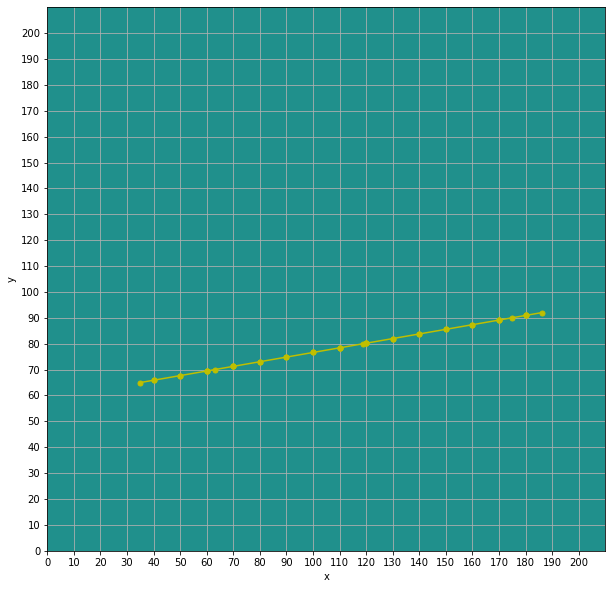

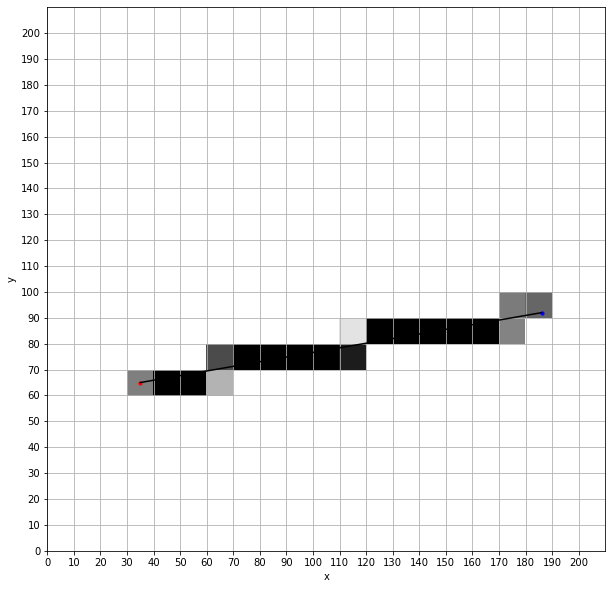

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R, c, v = raytrace(s, r, dx, dz, ox, oz, nx, nz, x, z)

# Find straigt line
m = (r[1]-s[1]) / (r[0]-s[0])
q = s[1] - m*s[0]

rayx = np.linspace(s[0], r[0], 10)
rayz = rayx * m + q

plt.figure(figsize=(10, 10))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.plot(rayx, rayz, c='k')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

In [4]:
c, v, v - R.ravel()[c]

(array([ 69,  90, 111, 132, 133, 154, 175, 196, 217, 238, 239, 260, 281,
        302, 323, 344, 365, 366, 387]),
 array([ 5.07930183, 10.15860365, 10.15860365,  3.00995664,  7.14864702,
        10.15860365, 10.15860365, 10.15860365, 10.15860365,  9.02986991,
         1.12873374, 10.15860365, 10.15860365, 10.15860365, 10.15860365,
        10.15860365,  4.89117954,  5.26742412,  6.09516219]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]))

In [5]:
R1 = csc_matrix((v, (np.zeros_like(c), c)), shape=(1, nx*nz))
np.allclose(R1.todense(), R)

True

In [6]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R.reshape(1, -1))
d = Rop * m

dana =  sqrt((s[0]-r[0])**2 + (s[1]-r[1])**2) / vback

d, d - dana

(array([0.15339492]), array([-8.32667268e-17]))

### Single horizontal ray

In [7]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

s = [35, 65]
r = [186, 65]

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

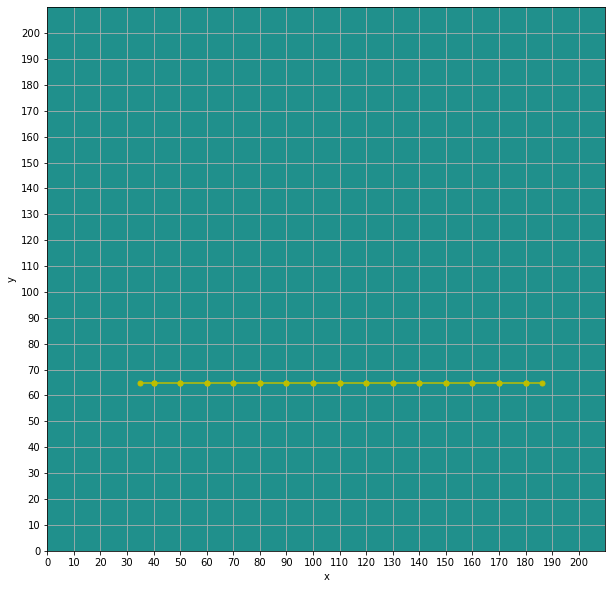

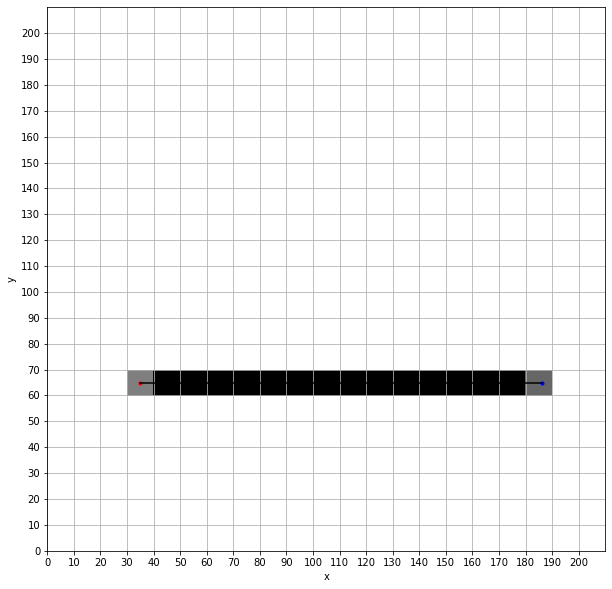

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R, c, v = raytrace(s, r, dx, dz, ox, oz, nx, nz, x, z)

# Find straigt line
m = (r[1]-s[1]) / (r[0]-s[0])
q = s[1] - m*s[0]

rayx = np.linspace(s[0], r[0], 10)
rayz = rayx * m + q

plt.figure(figsize=(10, 10))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.plot(rayx, rayz, c='k')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

In [9]:
c, v, v - R.ravel()[c]

(array([ 69,  90, 111, 132, 153, 174, 195, 216, 237, 258, 279, 300, 321,
        342, 363, 384]),
 array([ 5., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10.,  6.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [10]:
R1 = csc_matrix((v, (np.zeros_like(c), c)), shape=(1, nx*nz))
np.allclose(R1.todense(), R)

True

In [11]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R.reshape(1, -1))
d = Rop * m

dana =  sqrt((s[0]-r[0])**2 + (s[1]-r[1])**2) / vback

d, d - dana

(array([0.151]), array([2.77555756e-17]))

### Single vertical ray

In [12]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

s = [35, 67]
r = [35, 123]

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

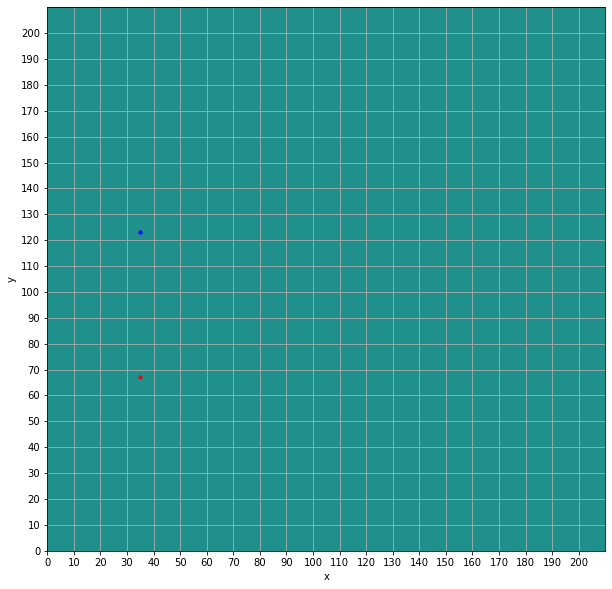

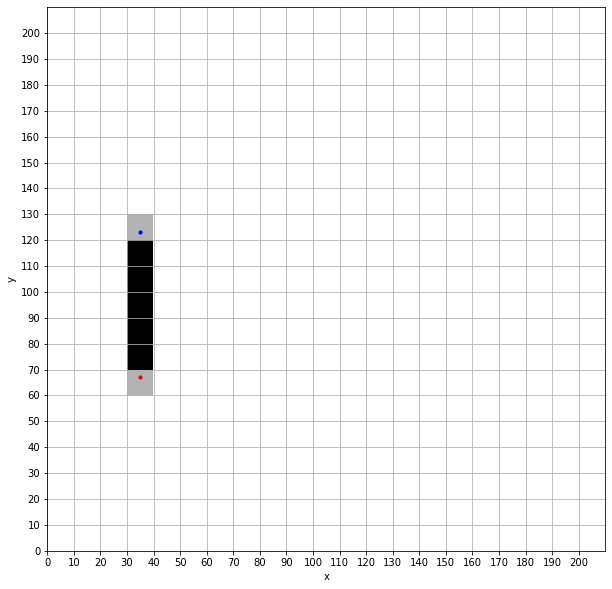

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R, c, v = raytrace(s, r, dx, dz, ox, oz, nx, nz, x, z)

plt.figure(figsize=(10, 10))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

In [14]:
c, v, R.ravel()[c]

(array([69, 70, 71, 72, 73, 74, 75]),
 array([ 3., 10., 10., 10., 10., 10.,  3.]),
 array([ 3., 10., 10., 10., 10., 10.,  3.]))

In [15]:
R1 = csc_matrix((v, (np.zeros_like(c), c)), shape=(1, nx*nz))
np.allclose(R1.todense(), R)

True

In [16]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R.reshape(1, -1))
d = Rop * m

dana =  sqrt((s[0]-r[0])**2 + (s[1]-r[1])**2) / vback

d, d - dana

(array([0.056]), array([0.]))

### Single negative ray

In [17]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

s = [35, 65]
r = [186, 30]

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

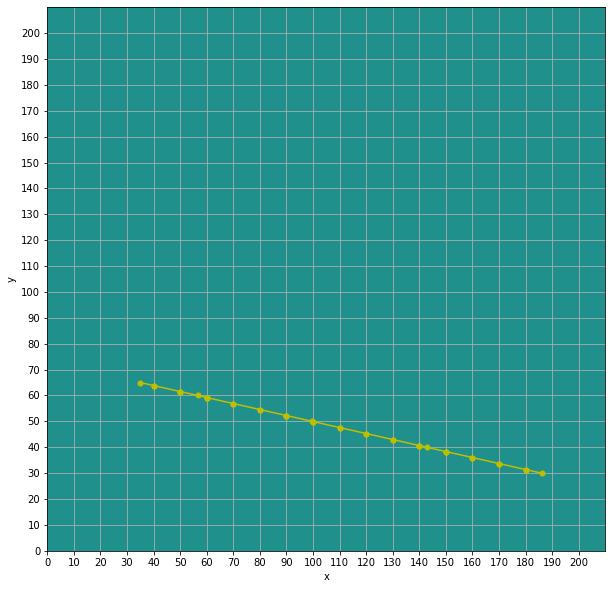

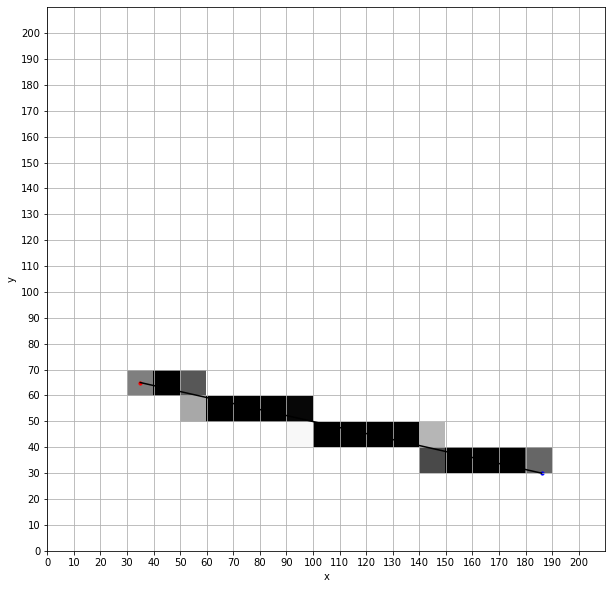

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R, c, v = raytrace(s, r, dx, dz, ox, oz, nx, nz, x, z)

# Find straigt line
m = (r[1]-s[1]) / (r[0]-s[0])
q = s[1] - m*s[0]

rayx = np.linspace(s[0], r[0], 10)
rayz = rayx * m + q

plt.figure(figsize=(10, 10))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.plot(rayx, rayz, c='k')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

In [19]:
c, v, v - R.ravel()[c]

(array([ 69,  90, 110, 111, 131, 152, 173, 193, 194, 214, 235, 256, 277,
        297, 298, 318, 339, 360, 381]),
 array([ 5.13255714, 10.26511429,  3.51946776,  6.74564653, 10.26511429,
        10.26511429, 10.26511429,  0.29328898,  9.97182531, 10.26511429,
        10.26511429, 10.26511429, 10.26511429,  7.33222449,  2.9328898 ,
        10.26511429, 10.26511429, 10.26511429,  6.15906857]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]))

In [20]:
R1 = csc_matrix((v, (np.zeros_like(c), c)), shape=(1, nx*nz))
np.allclose(R1.todense(), R)

True

In [21]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R.reshape(1, -1))
d = Rop * m

dana =  sqrt((s[0]-r[0])**2 + (s[1]-r[1])**2) / vback

d, d - dana

(array([0.15500323]), array([0.]))

### Source on the right side of receiver

In [22]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

r = [35, 65]
s = [186, 90]

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

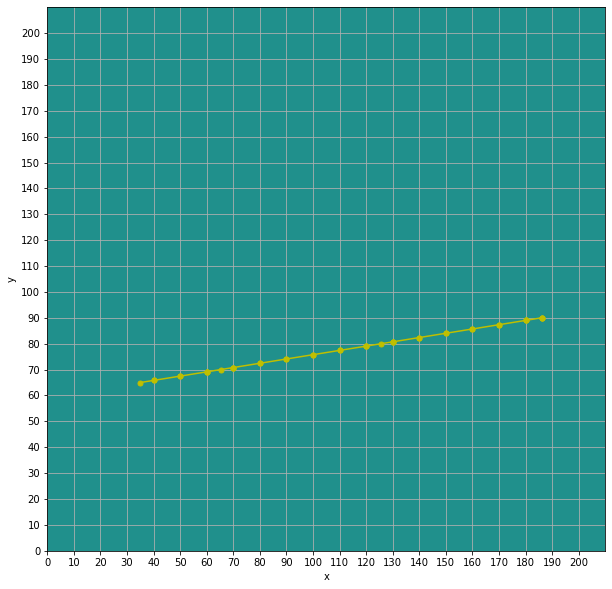

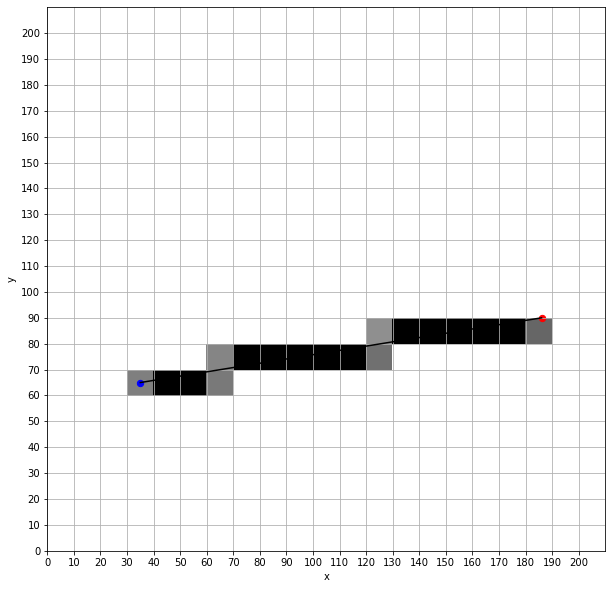

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R, c, v = raytrace(s, r, dx, dz, ox, oz, nx, nz, x, z)

# Find straigt line
m = (r[1]-s[1]) / (r[0]-s[0])
q = s[1] - m*s[0]

rayx = np.linspace(s[0], r[0], 10)
rayz = rayx * m + q

plt.figure(figsize=(10, 10))
plt.imshow(R.reshape(nx, nz).T, origin='lower', cmap='gray_r',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=40)
plt.scatter(r[0], r[1], c='b', s=40);
plt.xlabel('x')
plt.plot(rayx, rayz, c='k')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

In [24]:
c, v, v-R.ravel()[c]

(array([ 69,  90, 111, 132, 133, 154, 175, 196, 217, 238, 259, 260, 281,
        302, 323, 344, 365, 386, 387]),
 array([ 5.06806442, 10.13612884, 10.13612884,  5.270787  ,  4.86534184,
        10.13612884, 10.13612884, 10.13612884, 10.13612884, 10.13612884,
         5.67623215,  4.45989669, 10.13612884, 10.13612884, 10.13612884,
        10.13612884, 10.13612884,  6.0816773 ,  0.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]))

In [25]:
R1 = csc_matrix((v, (np.zeros_like(c), c)), shape=(1, nx*nz))
np.allclose(R1.todense(), R)

True

In [26]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R.reshape(1, -1))
d = Rop * m

dana =  sqrt((s[0]-r[0])**2 + (s[1]-r[1])**2) / vback

d, d - dana

(array([0.15305555]), array([1.11022302e-16]))

### Multiple rays

In [27]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

ns = 1
s = [35, 65]

nr = 40
r = np.empty((2, nr))
r[0] = 186
r[1] = np.arange(nr)*4 + 35

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 1000
vel = vback * np.ones((nx, nz))

True


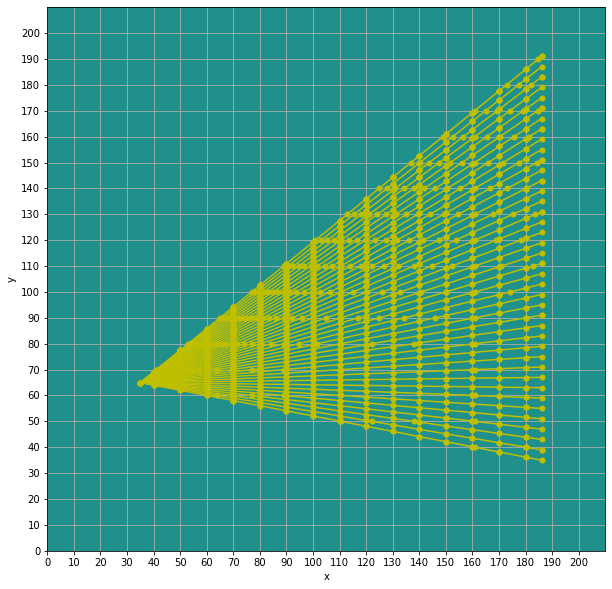

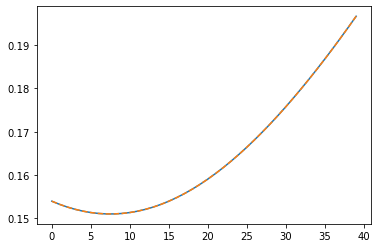

In [28]:
plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R = []
rows = []
cols = []
v = []
for irec in range(nr):
    Rtmp, ctmp, vtmp = raytrace(s, r[:, irec], dx, dz, ox, oz, nx, nz, x, z)
    R.append(Rtmp)
    rows.append(irec * np.ones_like(ctmp))
    cols.append(ctmp)
    v.append(vtmp)
R = np.vstack(R)
R1 = csc_matrix((np.hstack(v), (np.hstack(rows), np.hstack(cols))), shape=(nr, nx*nz))
print(np.allclose(R1.todense(), R))

m = (1./vel).flatten()
Rop = pylops.MatrixMult(R)
R1op = pylops.MatrixMult(R1)
d = Rop * m

dana = np.zeros(nr)
for irec in range(nr):
    dana[irec] =  sqrt((s[0]-r[0, irec])**2 + (s[1]-r[1, irec])**2) / vback
    
plt.figure()
plt.plot(d)
plt.plot(dana, '--');

In [29]:
%timeit -n20 -r5 Rop * m
%timeit -n20 -r5 R1op * m

11.3 µs ± 3.36 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)
17.1 µs ± 8.52 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)


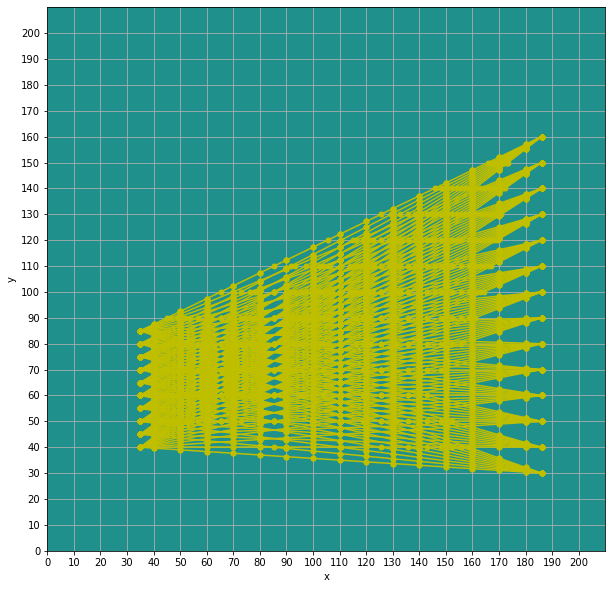

In [30]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

ns = 10
nr = 14
s = np.empty((2, ns))
r = np.empty((2, nr))

s[0] = 35
s[1] = np.arange(ns)*5 + 40
r[0] = 186
r[1] = np.arange(nr)*10 + 30

plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R1 = []
for isrc in range(ns):
    for irec in range(nr):
        R1.append(raytrace(s[:, isrc], r[:, irec], dx, dz, ox, oz, nx, nz, x, z)[0])
R1 = np.vstack(R1)

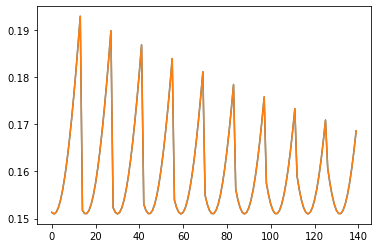

In [31]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R1)
d = Rop * m

dana = np.zeros((ns, nr))
for isrc in range(ns):
    for irec in range(nr):
        dana[isrc, irec] = sqrt((s[0, isrc]-r[0, irec])**2 + (s[1, isrc]-r[1, irec])**2) / vback
        

plt.plot(d)
plt.plot(dana.ravel())

## Heterogenous medium

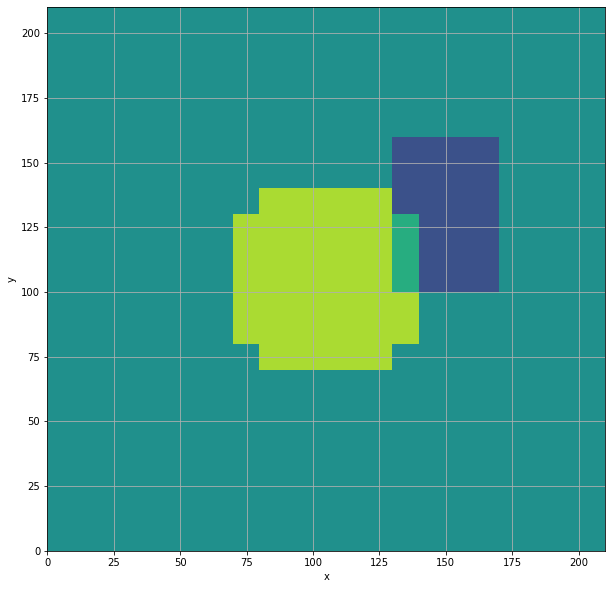

In [32]:
nx, nz = 21, 21
ox, oz = 0., 0.
dx, dz = 10., 10.

s = [35, 25]
r = [177, 104]

# Axes
x = ox + dx * np.arange(nx) + dx/2
z = oz + dz * np.arange(nz) + dz/2

# Model
vback = 2000
vel = vback * np.ones((nx, nz))
rr, cc = disk((nx//2, nz//2), radius=4, shape=vel.shape)
vel[rr, cc] = 3500
rr, cc = polygon([13, 16, 16, 13], [10, 10, 15, 15], shape=vel.shape)
vel[rr, cc] -= 1000

plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=4000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

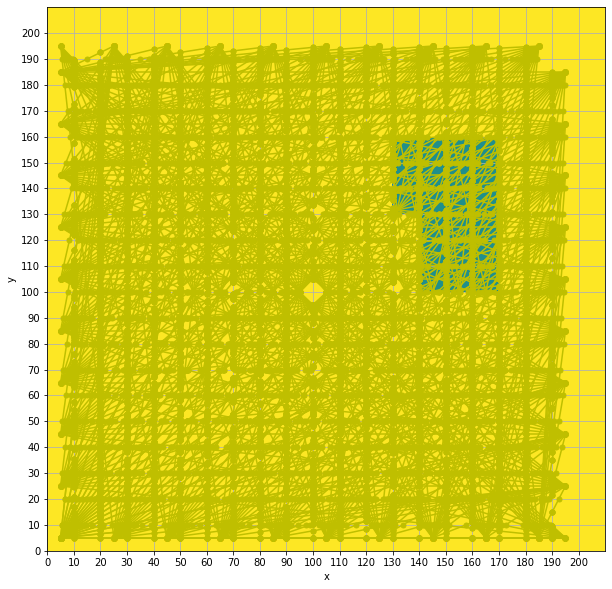

In [33]:
ns = 20
nr = 20
s = np.empty((2, ns))
r = np.empty((2, nr))

"""
#Crosshole
s[0,:ns] = 5
s[1,:ns] = np.arange(ns)*10 + 5
r[0,:nr] = 195
r[1,:nr] = np.arange(nr)*10 + 5
"""

"""
#VSP
s[0,:ns] = np.arange(ns)*10 + 7.5
s[1,:ns] = 197.5
r[0,:nr] = 102.5
r[1,:nr] = np.arange(nr)*10 + 2.5
"""

#Partially surronded
s[0,:ns//2] = 5
s[1,:ns//2] = np.arange(ns//2)*20 + 5
r[0,:nr//2] = 195
r[1,:nr//2] = np.arange(nr//2)*20 + 5

s[1,ns//2:] = 5
s[0,ns//2:] = np.arange(ns//2)*20 + 5
r[1,nr//2:] = 195
r[0,nr//2:] = np.arange(nr//2)*20 + 5

plt.figure(figsize=(10, 10))
plt.imshow(vel.T, origin='lower', vmin=0, vmax=2000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight')

R = []
for isrc in range(ns):
    for irec in range(nr):
        R.append(raytrace(s[:, isrc], r[:, irec], dx, dz, ox, oz, nx, nz, x, z)[0])
R = np.vstack(R)

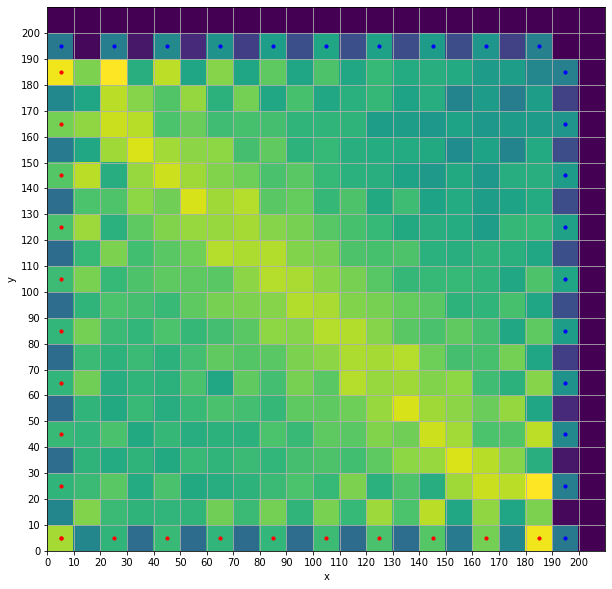

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(np.sum(R, axis=0).reshape(nx, nz).T, origin='lower',
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);plt.xlabel('x')
plt.xticks(x-dx//2)
plt.yticks(z-dx//2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

## Noise free inversion

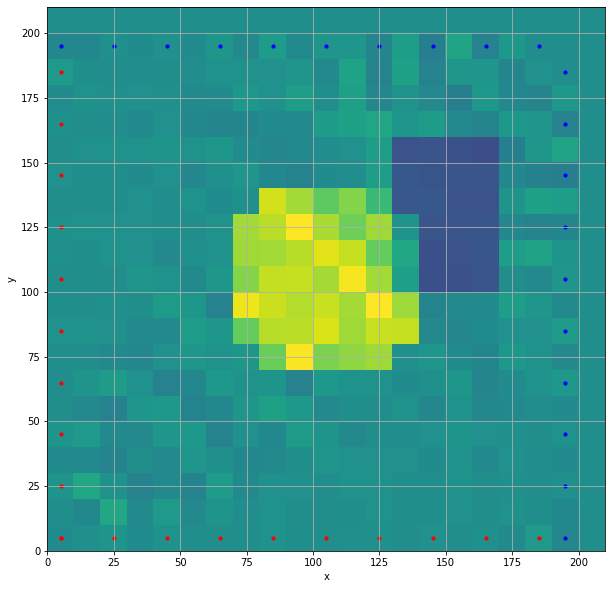

In [35]:
m = (1./vel).flatten()
Rop = pylops.MatrixMult(R)
d = Rop * m

minv = lsqr(Rop, d, x0=(1./vback) * np.ones(nx*nz), damp=1e-2, iter_lim=1000)[0]
vinv = 1. / (minv.reshape(nx, nz) + 1e-10)

plt.figure(figsize=(10, 10))
plt.imshow(vinv.T, origin='lower', vmin=0, vmax=4000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

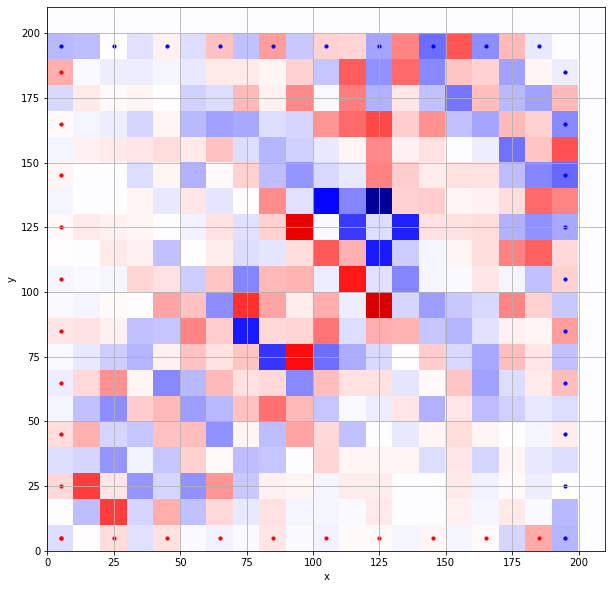

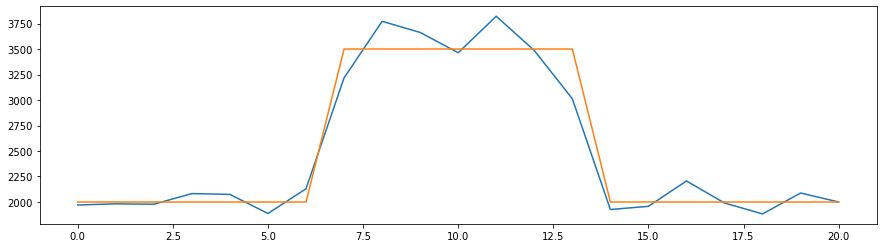

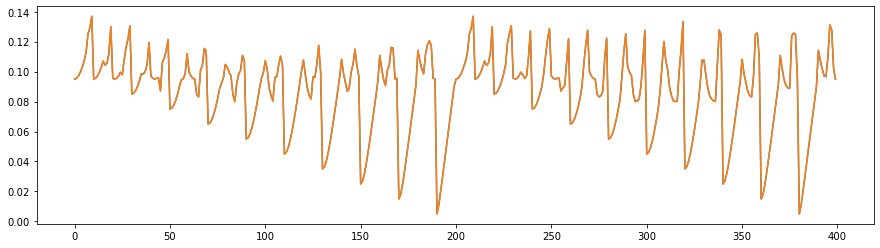

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(vinv.T-vel.T, cmap='seismic', origin='lower', vmin=-1000, vmax=1000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

plt.figure(figsize=(15, 4))
plt.plot(vinv[nx//2])
plt.plot(vel[nx//2])

plt.figure(figsize=(15, 4))
plt.plot(d.ravel())
plt.plot(Rop *minv);

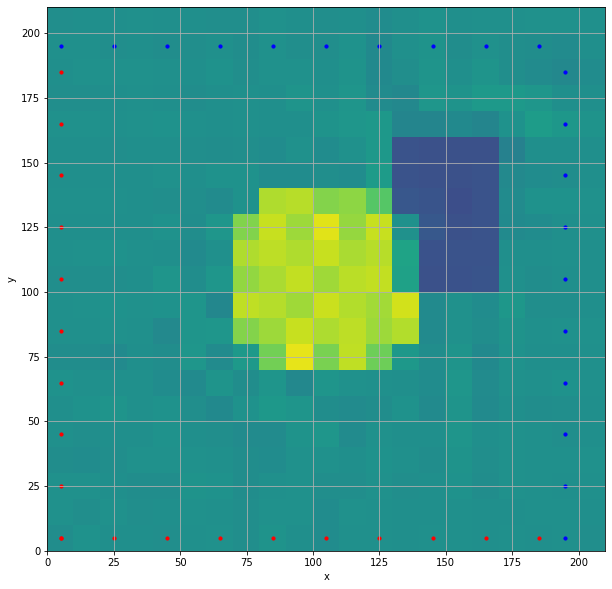

In [37]:
Dop = pylops.Laplacian((nx, nz))

minv = pylops.optimization.leastsquares.RegularizedInversion(Rop, [Dop,], d, epsRs=[1e0,], 
                                                             x0=(1./vback) * np.ones(nx*nz), 
                                                             **dict(iter_lim=100, damp=1e-1))
vinv = 1. / (minv.reshape(nx, nz) + 1e-10)

plt.figure(figsize=(10, 10))
plt.imshow(vinv.T, origin='lower', vmin=0, vmax=4000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

### Noisy inversion

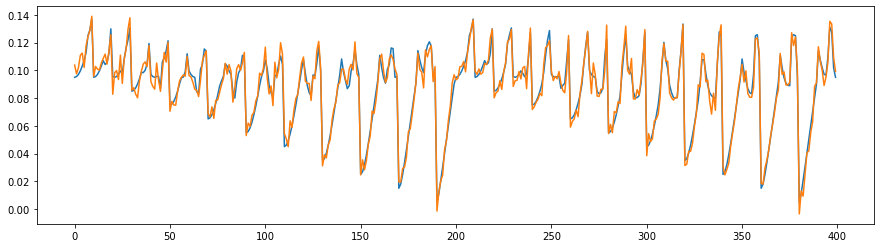

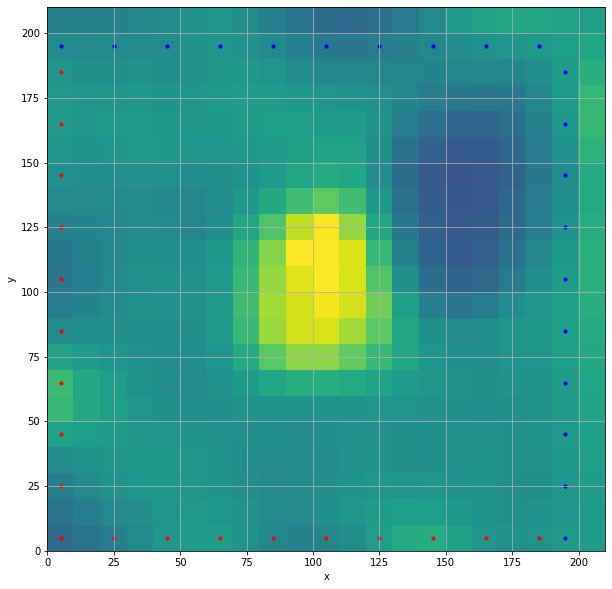

In [38]:
dn = d + 5e-3*np.random.normal(0., 1., ns*nr)
plt.figure(figsize=(15, 4))
plt.plot(d.ravel())
plt.plot(dn)

Dop = pylops.Laplacian((nx, nz))

minv = pylops.optimization.leastsquares.RegularizedInversion(Rop, [Dop,], dn, epsRs=[5e1,], 
                                                             x0=(1./vback) * np.ones(nx*nz), 
                                                             **dict(iter_lim=100, damp=1e-1))
vinv = 1. / (minv.reshape(nx, nz) + 1e-10)

plt.figure(figsize=(10, 10))
plt.imshow(vinv.T, origin='lower', vmin=0, vmax=4000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

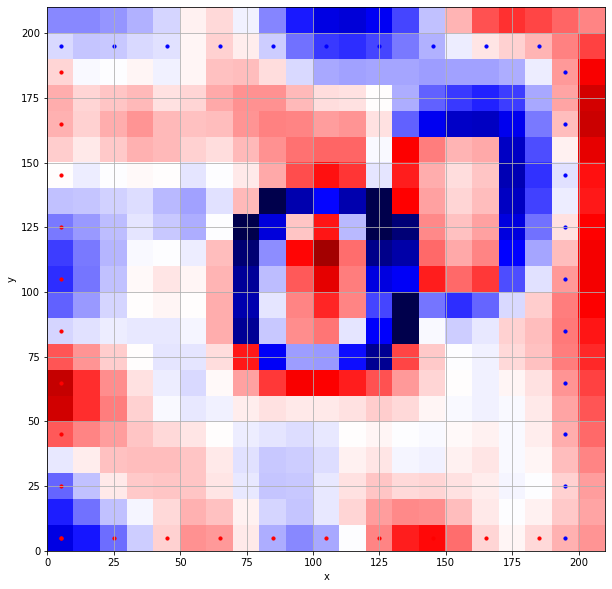

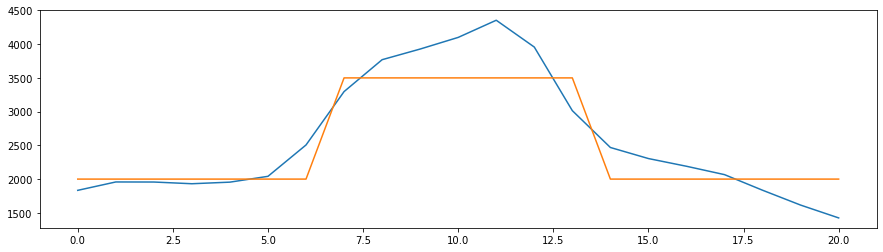

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(vinv.T-vel.T, cmap='seismic', origin='lower', vmin=-1000, vmax=1000,
           extent=(x[0]-dx//2, x[-1]+dx//2, z[0]-dz//2, z[-1]+dz//2))
plt.scatter(s[0], s[1], c='r', s=10)
plt.scatter(r[0], r[1], c='b', s=10);
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on', which='both')
plt.axis('tight');

plt.figure(figsize=(15, 4))
plt.plot(vinv[nx//2])
plt.plot(vel[nx//2]);